# Silicon nanowire

Here we compute band structure of a silicon hydrogen-passivated infinie nanowire. The nanowire width equals two crystall latices of bulk silicon. The nanowire is translated along [001] crystalographic axis of silicon.

## 0. Prerequisites

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tb

## 1. Specify basis sets
Here we use two predefined basis sets, called 'SiliconSP3D5S' and 'HydrogenS', stored in the progam.

In [2]:
a_si = 5.50
PRIMITIVE_CELL = [[0, 0, a_si]]
tb.Orbitals.orbital_sets = {'Si': 'SiliconSP3D5S', 'H': 'HydrogenS'}

h = tb.Hamiltonian(xyz='../input_samples/SiNW2.xyz', nn_distance=2.4)
h.initialize()
h.set_periodic_bc(PRIMITIVE_CELL)

The verbosity level is 2
The radius of the neighbourhood is 2.4 Ang

---------------------------------

The xyz-file:
 77
H62Si82 cell written by cluster.py
Si1    0.000000    0.000000    0.000000
Si2    2.750000    2.750000    0.000000
Si3    2.750000    0.000000    2.750000
Si4    0.000000    2.750000    2.750000
Si5    1.375000    1.375000    1.375000
Si6    4.125000    4.125000    1.375000
Si7    4.125000    1.375000    4.125000
Si8    1.375000    4.125000    4.125000
Si9    0.000000    5.500000    0.000000
Si10    2.750000    8.250000    0.000000
Si11    2.750000    5.500000    2.750000
Si12    0.000000    8.250000    2.750000
Si13    1.375000    6.875000    1.375000
Si14    4.125000    9.625000    1.375000
Si15    4.125000    6.875000    4.125000
Si16    1.375000    9.625000    4.125000
Si17    5.500000    0.000000    0.000000
Si18    8.250000    2.750000    0.000000
Si19    8.250000    0.000000    2.750000
Si20    5.500000    2.750000    2.750000
Si21    6.875000    1.375000    

---------------------------------



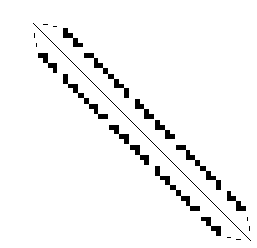

In [3]:
plt.axis('off')
plt.spy(np.abs(h.h_matrix))

## 2. Band structure computation

In [4]:
num_points = 20
kk = np.linspace(0, 3.14 / a_si, num_points, endpoint=True)
band_sructure = []

for jj in range(num_points):
    vals, _ = h.diagonalize_periodic_bc([0.0, 0.0, kk[jj]])
    band_sructure.append(vals)

band_sructure = np.array(band_sructure)


## 3. Visualization

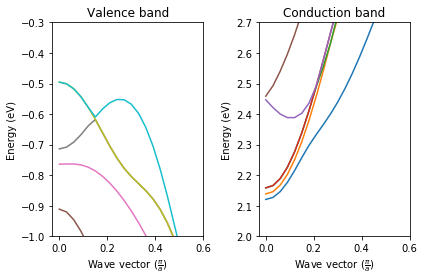

In [5]:
split = 100
fig, ax = plt.subplots(1, 2)
ax[0].set_ylim(-1.0, -0.3)
ax[0].plot(kk, np.sort(np.real(band_sructure))[:, :split])
ax[0].set_xlabel(r'Wave vector ($\frac{\pi}{a}$)')
ax[0].set_ylabel(r'Energy (eV)')
ax[0].set_title('Valence band')

ax[1].set_ylim(2.0, 2.7)
ax[1].plot(kk, np.sort(np.real(band_sructure))[:, split:])
ax[1].set_xlabel(r'Wave vector ($\frac{\pi}{a}$)')
ax[1].set_ylabel(r'Energy (eV)')
ax[1].set_title('Conduction band')
fig.tight_layout()
plt.savefig('nanowire_bs.pdf')
plt.show()